# AT&T Spam Detector

In [ ]:

import tensorflow as tf
import pathlib
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import io
import plotly.express as px
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [ ]:
spam = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/.ipynb_checkpoints/deep learning/spam.csv', encoding='latin-1')

In [ ]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
print("Number of rows : {}".format(spam.shape[0]))
print()

print("Display of dataset: ")
display(spam.head())
print()

print("Basics statistics: ")
data_desc = spam.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*spam.isnull().sum()/spam.shape[0])

Number of rows : 5572

Display of dataset: 


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN



Basics statistics: 


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2



Percentage of missing values: 


v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [ ]:
##colonnes Unnamed: 2     Unnamed: 3     Unnamed: 4   à supprimer

In [ ]:
# Supprimer les 3 colonnes indesirables
colonnes_a_supprimer = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
spam.drop(columns=colonnes_a_supprimer, inplace=True)

In [ ]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
percent_spam = (spam["v1"].value_counts(1).round(4)[1])*100
percent_ham = 100 - percent_spam
print(f"{percent_spam}% of mails are spam, while {percent_ham}% are ham.\n")



13.41% of mails are spam, while 86.59% are ham.



In [ ]:
import plotly.express as px
fig = px.histogram(spam, x='v1', color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()


In [ ]:
spam["spam_clean"] = spam["v2"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" " or ch=="'"))
spam["spam_clean"] = spam["spam_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())
spam["spam_clean"] = spam["spam_clean"].str.strip()

spam

,v1,v2,spam_clean
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,will ì b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...


In [ ]:
!python -m spacy download en_core_web_sm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
spam['spam_clean'] = spam['spam_clean'].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) and (token.text not in STOP_WORDS)]))
spam.head()

,v1,v2,spam_clean
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think usf live


In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, oov_token="out_of_vocab")

tokenizer.fit_on_texts(spam['spam_clean'])

spam["spam_clean_encoded"] = tokenizer.texts_to_sequences(spam['spam_clean'])
spam.head()

,v1,v2,spam_clean,spam_clean_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...,"[1, 230, 446, 463, 941, 32, 50, 204, 942, 78, ..."
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,"[8, 195, 464, 289, 2, 1]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[11, 300, 3, 532, 661, 30, 1, 848, 423, 1, 1, ..."
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c,"[2, 125, 150, 1, 2, 79]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think usf live,"[704, 20, 662, 129]"


In [ ]:
spam['v1_encoded'] = spam['v1'].apply(lambda x: 0 if x == 'ham' else 1)
spam.head()

,v1,v2,spam_clean,spam_clean_encoded,v1_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...,"[1, 230, 446, 463, 941, 32, 50, 204, 942, 78, ...",0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,"[8, 195, 464, 289, 2, 1]",0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[11, 300, 3, 532, 661, 30, 1, 848, 423, 1, 1, ...",1
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c,"[2, 125, 150, 1, 2, 79]",0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think usf live,"[704, 20, 662, 129]",0


In [ ]:
# Créer un dictionnaire de remplacement des valeurs
remplacement = {'ham': 0, 'spam': 1}

# Remplacer les valeurs dans la colonne 'v1' en utilisant le dictionnaire de remplacement
spam['v1_encoded'] = spam['v1'].replace(remplacement)

# Afficher les premières lignes du DataFrame avec la nouvelle colonne 'v1_encoded'
spam.head()

,v1,v2,spam_clean,spam_clean_encoded,v1_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...,"[1, 230, 446, 463, 941, 32, 50, 204, 942, 78, ...",0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,"[8, 195, 464, 289, 2, 1]",0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[11, 300, 3, 532, 661, 30, 1, 848, 423, 1, 1, ...",1
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c,"[2, 125, 150, 1, 2, 79]",0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think usf live,"[704, 20, 662, 129]",0


In [ ]:
spam_pad = tf.keras.preprocessing.sequence.pad_sequences(spam.spam_clean_encoded, padding="post")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valtest, y_train, y_valtest = train_test_split(spam_pad,spam.v1_encoded, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5)

In [ ]:
train_batch = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(64)
test_batch = tf.data.Dataset.from_tensor_slices((X_test, y_test)).shuffle(len(X_test)).batch(64)
val_batch = tf.data.Dataset.from_tensor_slices((X_val, y_val)).shuffle(len(X_val)).batch(64)

In [ ]:
for spam, v1 in train_batch.take(1):
  print(spam, v1)

tf.Tensor(
[[523 103 283 ...   0   0   0]
 [  7 845   1 ...   0   0   0]
 [476   1 119 ...   0   0   0]
 ...
 [  2   5  32 ...   0   0   0]
 [101 499  35 ...   0   0   0]
 [ 54 996   1 ...   0   0   0]], shape=(64, 74), dtype=int32) tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0], shape=(64,), dtype=int64)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.losses import BinaryCrossentropy
from keras.layers import Dropout

In [ ]:
embedding_dim=8
vocab_size = 1000
model = Sequential([
  Embedding(vocab_size +1, embedding_dim, input_shape= [spam.shape[1]], name="embedding"),
  GlobalAveragePooling1D(),
  Dense(16, activation='relu'),
  Dense(1, activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 74, 8)             8008      
                                                                 
 global_average_pooling1d_1  (None, 8)                 0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 16)                144       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 8169 (31.91 KB)
Trainable params: 8169 (31.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer= tf.keras.optimizers.Adam()

In [ ]:
model.compile(optimizer= optimizer,
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_batch, epochs=50, validation_data=test_batch)

Epoch 1/50
53/53 [==============================] - 1s 6ms/step - loss: 0.6496 - accuracy: 0.8361 - val_loss: 0.5865 - val_accuracy: 0.8735
Epoch 2/50
53/53 [==============================] - 0s 6ms/step - loss: 0.5223 - accuracy: 0.8639 - val_loss: 0.4449 - val_accuracy: 0.8735
Epoch 3/50
53/53 [==============================] - 0s 3ms/step - loss: 0.4093 - accuracy: 0.8639 - val_loss: 0.3651 - val_accuracy: 0.8735
Epoch 4/50
53/53 [==============================] - 0s 4ms/step - loss: 0.3690 - accuracy: 0.8639 - val_loss: 0.3448 - val_accuracy: 0.8735
Epoch 5/50
53/53 [==============================] - 0s 3ms/step - loss: 0.3567 - accuracy: 0.8639 - val_loss: 0.3353 - val_accuracy: 0.8735
Epoch 6/50
53/53 [==============================] - 0s 3ms/step - loss: 0.3470 - accuracy: 0.8639 - val_loss: 0.3253 - val_accuracy: 0.8735
Epoch 7/50
53/53 [==============================] - 0s 3ms/step - loss: 0.3368 - accuracy: 0.8639 - val_loss: 0.3147 - val_accuracy: 0.8735
Epoch 8/50
53/53 [==

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Scatter(
                          y=history.history["loss"],
                          name="Training loss",
                          mode="lines"
                          ),
                      go.Scatter(
                          y=history.history["val_loss"],
                          name="Validation loss",
                          mode="lines"
                          )
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'
)
fig.show()

In [ ]:
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["accuracy"],
                          name="Training accuracy",
                          mode="lines"
                          ),
                      go.Scatter(
                          y=history.history["val_accuracy"],
                          name="Validation accruracy",
                          mode="lines")])
fig.update_layout(
    title='Training and val accuracy across epochs',
    xaxis_title='epochs',
    yaxis_title='Accuracy'
)
fig.show()

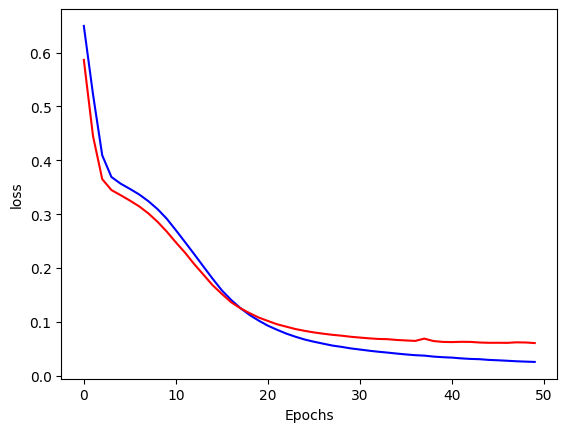

In [ ]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()
